#### ESERCIZIO 6.1


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


def takeData(file_path):
    dati = []  # Lista per contenere i dati letti
    try:
        with open(file_path, 'r') as file:
            # Ignora la prima riga
            next(file)
            for riga in file:
                # Separa i dati utilizzando qualsiasi quantità di spazio o tab come delimitatore
                dati_riga = riga.strip().split()
                
                # Converte i dati in float e aggiunge alla lista dati
                if len(dati_riga) >= 3:  # Ensure there are at least 3 elements
                    dati_float = [float(dato) for dato in dati_riga[:3]]
                    dati.append(dati_float)
                
    except FileNotFoundError:
        print(f"Errore: il file {file_path} non esiste.")
    except Exception as e:
        print(f"Errore durante la lettura del file: {e}")

    return np.array(dati) # Converte la lista di liste in un array NumPy



##### _ENERGIA TOTALE_ 

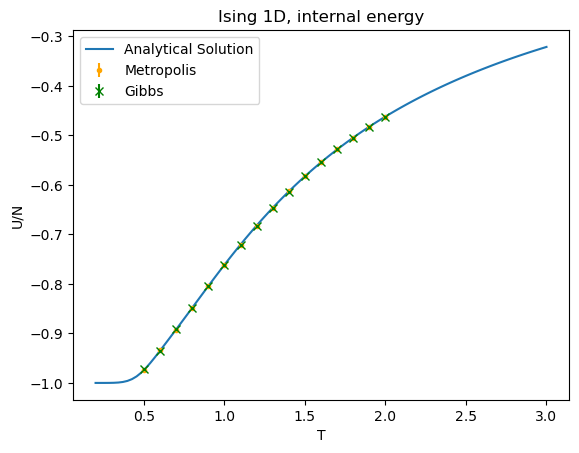

In [3]:

# DATI SIMULATI 
dati_total_MT = takeData("OUTPUT_metr/total_energy.dat") #DATI METROPOLIS
x_values_total_MT = dati_total_MT[:, 1]  # Valori
y_errors_total_MT = dati_total_MT[:, 2]  #Errori

temp = dati_total_MT[:, 0]

dati_total_GB = takeData("OUTPUT_gibbs/total_energy.dat") #DATI GIBBS
x_values_total_GB = dati_total_GB[:, 1]  # Valori
y_errors_total_GB = dati_total_GB[:, 2]  # Errori


#SOLUZIONE ANALITICA  
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
###

plt.plot(T, e, label="Analytical Solution")
plt.errorbar(temp, x_values_total_MT, yerr=y_errors_total_MT, fmt='.', label="Metropolis", color = "orange")
plt.errorbar(temp, x_values_total_GB, yerr=y_errors_total_GB, fmt='x', label="Gibbs", color = "green")
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

##### _CALORE SPECIFICO_


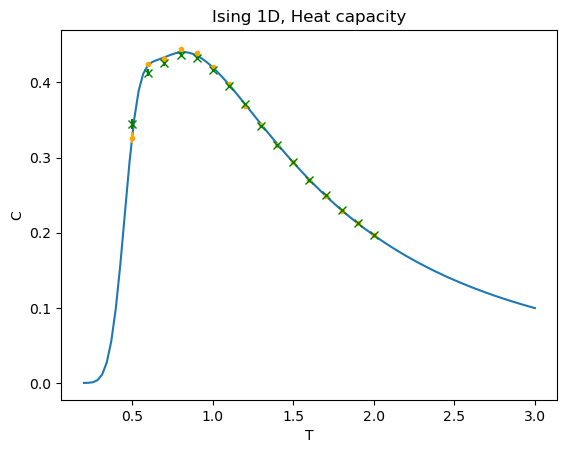

In [4]:
# DATI SIMULATI
dati_heat_MT = takeData("OUTPUT_metr/specific_heat.dat") #DATI METROPOLIS
x_values_heat_MT = dati_heat_MT[:, 1]  #Valori
y_errors_heat_MT = dati_heat_MT[:, 2]  #Errori


dati_heat_GB = takeData("OUTPUT_gibbs/specific_heat.dat") #DATI GIBBS
x_values_heat_GB = dati_heat_GB[:, 1]  # Valori
y_errors_heat_GB = dati_heat_GB[:, 2]  # Errori



#SOLUZIONE ANALITICA 
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
###

plt.plot(T, heat, label="Analytical Solution")
plt.errorbar(temp, x_values_heat_MT, yerr=y_errors_heat_MT, fmt='.', label="Metropolis", color = "orange")
plt.errorbar(temp, x_values_heat_GB, yerr=y_errors_heat_GB, fmt='x', label="Gibbs", color = "green")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()


##### _SUSCETTIVITA' MAGNETICA_

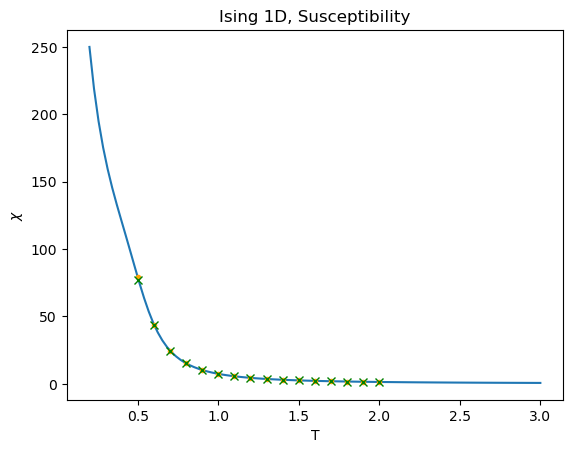

In [56]:

# DATI SIMULATI
dati_chi_MT = takeData("OUTPUT_metr/susceptibility.dat") #DATI METROPOLIS
x_values_chi_MT = dati_chi_MT[:, 1]  #Valori
y_errors_chi_MT = dati_chi_MT[:, 2]  #Errori


dati_chi_GB = takeData("OUTPUT_gibbs/susceptibility.dat") #DATI GIBBS
x_values_chi_GB = dati_chi_GB[:, 1]  # Valori
y_errors_chi_GB = dati_chi_GB[:, 2]  # Errori



#SOLUZIONE ANALITICA
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
###

plt.plot(T, X,label="Analytical Solution" )
plt.errorbar(temp, x_values_chi_MT, yerr=y_errors_chi_MT, fmt='.', label="Metropolis", color = "orange")
plt.errorbar(temp, x_values_chi_GB, yerr=y_errors_chi_GB, fmt='x', label="Gibbs", color = "green")
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

##### _MAGNETIZZAZIONE_     (campo esterno h = 0.02)

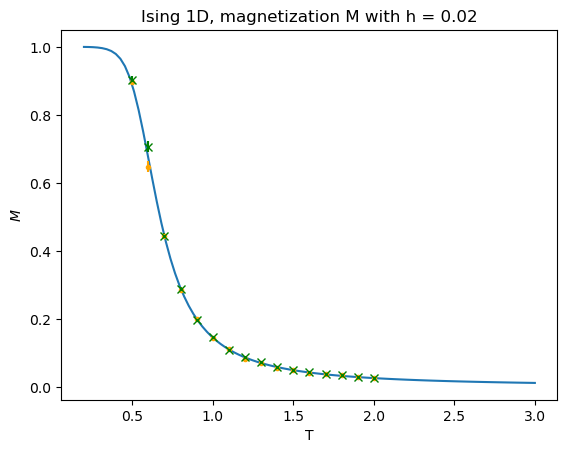

In [5]:

# DATI SIMULATI
dati_magn_MT = takeData("OUTPUT_metr/magnetization.dat") #DATI METROPOLIS
x_values_magn_MT = dati_magn_MT[:, 1]  #Valori
y_errors_magn_MT = dati_magn_MT[:, 2]  #Errori


dati_magn_GB = takeData("OUTPUT_gibbs/magnetization.dat") #DATI GIBBS
x_values_magn_GB = dati_magn_GB[:, 1]  # Valori
y_errors_magn_GB = dati_magn_GB[:, 2]  # Errori



#SOLUZIONE ANALITICA 
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
###

plt.plot(T, M, label="Analytical Solution")
plt.errorbar(temp, x_values_magn_MT, yerr=y_errors_magn_MT, fmt='.', label="Metropolis", color = "orange")
plt.errorbar(temp, x_values_magn_GB, yerr=y_errors_magn_GB, fmt='x', label="Gibbs", color = "green")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()
